In [6]:
# -*- coding: utf-8 -*-
"""
netflix_analysis.py

Main analysis script for the Netflix Content Strategy project.
This script orchestrates the entire pipeline:
1. Sets up the environment and global variables.
2. Runs the data preprocessing pipeline.
3. Generates exploratory data analysis (EDA) visualizations.
4. Conducts text analysis (NLP) on descriptions.
5. Performs statistical and strategic modeling.
6. Saves all analysis artifacts (data and plots).

To run this script:
1. Make sure all required CSV/TSV files are in the 'data/' directory.
2. Run 'python netflix_analysis.py' from your terminal.
"""

# -----------------------------------------------------------------------------
# 1. Environment Setup
# -----------------------------------------------------------------------------
import os
import sys
import subprocess
import pandas as pd

# --- Install All Project Requirements ---
def install_all_requirements():
    """Installs requirements from all modules."""
    print("--- Installing All Project Requirements ---")
    modules_to_install = [
        'pandas', 'rapidfuzz', 'plotly', 'scikit-learn', 'nltk',
        'textblob', 'wordcloud', 'matplotlib', 'scipy', 'statsmodels',
        'networkx', 'mlxtend'
    ]
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install"] + modules_to_install)
        print("--- All packages installed successfully. ---")
    except Exception as e:
        print(f"Error installing packages: {e}")

# Uncomment to run the installation
install_all_requirements()

# --- Import Custom Modules ---
try:
    import data_preprocessing as dp
    import visualization_functions as viz
    import text_analysis as ta
    import statistical_analysis as sa
except ImportError:
    print("Error: Could not import custom modules.")
    print("Please ensure all .py files (data_preprocessing.py, etc.) are in the same directory.")
    sys.exit()

# -----------------------------------------------------------------------------
# 2. Global Variables and Configuration
# -----------------------------------------------------------------------------

# --- Directory and File Paths ---
DATA_DIR = 'data'
VIZ_DIR = 'visualizations'
OUTPUT_DIR = 'analysis_outputs'

# --- Create Output Directories ---
os.makedirs(VIZ_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)

# --- Plotting Themes ---
PLOTLY_TEMPLATE = 'plotly_dark'
NETFLIX_RED = '#E50914'
NETFLIX_BLACK = '#000000'
COLOR_SCALE_REDS = 'Reds'

# --- Analysis Parameters ---
TOP_N_COUNTRIES = 15
TOP_N_GENRES = 15
TOP_N_ACTORS = 20
TOP_N_DIRECTORS = 20

# 6. Analysis Complete

print("\n" + "="*50)
print("ANALYSIS PIPELINE COMPLETE")
print("="*50)
print(f"All visualizations saved to: {VIZ_DIR}")
print(f"All data outputs saved to: {OUTPUT_DIR}")

--- Installing All Project Requirements ---
--- All packages installed successfully. ---

ANALYSIS PIPELINE COMPLETE
All visualizations saved to: visualizations
All data outputs saved to: analysis_outputs


In [7]:
# Run the main preprocessing pipeline
dataframes = dp.main_preprocessing_pipeline()

if dataframes:
    # Unpack the processed data
    netflix_2021 = dataframes['netflix_2021']
    netflix_2025 = dataframes['netflix_2025']
    netflix_imdb = dataframes['netflix_imdb']
    genre_matrix = dataframes['genre_matrix']
    unique_genres = dataframes['unique_genres']

    print("\nPreprocessing complete. DataFrames are loaded.")
else:
    print("\nFatal Error: Data preprocessing failed. Exiting.")
    sys.exit()

--- Starting Main Data Pipeline ---
Loading Netflix datasets...
Netflix datasets loaded successfully.
Loading IMDb datasets (basics and ratings)...
IMDb data loaded and merged. Total records: 1629765
Cleaning 2021 dataset...
Engineering features (year_added, lag_time, etc.)...
Cleaning 2025 datasets...
Creating one-hot encoded genre matrix...
Genre matrix created with 42 unique genres.
Mapping IMDb ratings to Netflix titles...
IMDb Mapping complete. 7012 titles matched.
--- Data Pipeline Finished Successfully ---

Preprocessing complete. DataFrames are loaded.


In [8]:
# --- 2. ADD THIS ENTIRE PRE-PROCESSING BLOCK ---
print("Pre-processing 'netflix_2021' DataFrame...")

# 2a. Process Dates
# The .str.strip() is crucial for this dataset
'''netflix_2021['date_added'] = pd.to_datetime(
    netflix_2021['date_added'].str.strip(), errors='coerce'
)'''
netflix_2021 = netflix_2021.dropna(subset=['date_added'])

# 2b. Create Date-Based Columns
netflix_2021['year_added'] = netflix_2021['date_added'].dt.year
netflix_2021['month_added'] = netflix_2021['date_added'].dt.strftime('%B') # e.g., "January"

# 2c. Create Lag Time Column
netflix_2021['release_year'] = pd.to_numeric(
    netflix_2021['release_year'], errors='coerce'
)
netflix_2021['acquisition_lag'] = netflix_2021['year_added'] - netflix_2021['release_year']

# 2d. Create "Primary" Columns
netflix_2021['primary_country'] = netflix_2021['country'].fillna('Unknown').apply(lambda x: x.split(',')[0].strip())
netflix_2021['primary_genre'] = netflix_2021['listed_in'].fillna('Unknown').apply(lambda x: x.split(',')[0].strip())

# 2e. Create List Columns (for treemaps and mock data)
netflix_2021['country_list'] = netflix_2021['country'].fillna('Unknown').apply(lambda x: [i.strip() for i in x.split(',')])
netflix_2021['genre_list'] = netflix_2021['listed_in'].fillna('').apply(lambda x: [i.strip() for i in x.split(',')])
netflix_2021['director_list'] = netflix_2021['director'].fillna('Unknown').apply(lambda x: [i.strip() for i in x.split(',')])
netflix_2021['cast_list'] = netflix_2021['cast'].fillna('Unknown').apply(lambda x: [i.strip() for i in x.split(',')])

print("Pre-processing complete.")
# --- END OF NEW BLOCK ---

Pre-processing 'netflix_2021' DataFrame...
Pre-processing complete.


In [9]:
# --- Generate and Save EDA Plots ---

print("Generating EDA plots...")

# 1. Content Type Pie Chart
fig_pie = viz.plot_content_type_pie(netflix_2021, template=PLOTLY_TEMPLATE)
fig_pie.write_html(os.path.join(VIZ_DIR, 'eda_01_content_type_pie.html'))

# 2. Content Trend Line Chart
fig_trend = viz.plot_content_trend_lines(netflix_2021, template=PLOTLY_TEMPLATE)
fig_trend.write_html(os.path.join(VIZ_DIR, 'eda_02_content_trend_lines.html'))

# 3. Top Countries Bar Chart
fig_top_countries = viz.plot_top_n_bar(
    netflix_2021, 'primary_country', f'Top {TOP_N_COUNTRIES} Content-Producing Countries',
    n=TOP_N_COUNTRIES, template=PLOTLY_TEMPLATE, color_scale=COLOR_SCALE_REDS
)
fig_top_countries.write_html(os.path.join(VIZ_DIR, 'eda_03_top_countries.html'))

# 4. Top Genres Bar Chart
fig_top_genres = viz.plot_top_n_bar(
    netflix_2021, 'primary_genre', f'Top {TOP_N_GENRES} Primary Genres',
    n=TOP_N_GENRES, template=PLOTLY_TEMPLATE, color_scale=COLOR_SCALE_REDS
)
fig_top_genres.write_html(os.path.join(VIZ_DIR, 'eda_04_top_genres.html'))

# 5. Production Choropleth Map
fig_map = viz.plot_choropleth_map(netflix_2021, template=PLOTLY_TEMPLATE, color_scale=COLOR_SCALE_REDS)
fig_map.write_html(os.path.join(VIZ_DIR, 'eda_05_choropleth_map.html'))

# 6. Acquisition Lag Time Trend
fig_lag = viz.plot_lag_time_trend(netflix_2021, template=PLOTLY_TEMPLATE)
fig_lag.write_html(os.path.join(VIZ_DIR, 'eda_06_lag_time_trend.html'))

# 7. Monthly Additions Heatmap
fig_heatmap = viz.plot_monthly_heatmap(netflix_2021, template=PLOTLY_TEMPLATE)
fig_heatmap.write_html(os.path.join(VIZ_DIR, 'eda_07_monthly_heatmap.html'))

# 8. Maturity Rating Distribution
# Define a variable for 'n' just like your others
TOP_N_RATINGS = 15
fig_rating_bar = viz.plot_rating_distribution(
    netflix_2021, n=TOP_N_RATINGS, template=PLOTLY_TEMPLATE, color_scale=COLOR_SCALE_REDS
)
fig_rating_bar.write_html(os.path.join(VIZ_DIR, 'eda_08_rating_distribution.html'))

# 9. Top Directors Treemap
TOP_N_CONTRIB = 25
fig_treemap_dir = viz.plot_treemap_top_contributors(
    netflix_2021,
    column_to_explode='director_list',
    title=f'Top {TOP_N_CONTRIB} Directors',
    n=TOP_N_CONTRIB,
    template=PLOTLY_TEMPLATE
)
if fig_treemap_dir is not None:
    fig_treemap_dir.write_html(os.path.join(VIZ_DIR, 'eda_10_top_directors_treemap.html'))
else:
    print("...Skipped 10: Top Directors Treemap (missing 'director_list' column).")

# 10. Top Actors Treemap
fig_treemap_actor = viz.plot_treemap_top_contributors(
    netflix_2021,
    column_to_explode='cast_list',
    title=f'Top {TOP_N_CONTRIB} Actors',
    n=TOP_N_CONTRIB,
    template=PLOTLY_TEMPLATE
)
fig_treemap_actor.write_html(os.path.join(VIZ_DIR, 'eda_11_top_actors_treemap.html'))

print("EDA plots generated and saved to 'visualizations/' directory.")

Generating EDA plots...
Plotting distribution of maturity ratings...
Generating treemap for top 25 director_list...
Generating treemap for top 25 cast_list...
EDA plots generated and saved to 'visualizations/' directory.



SECTION 4: TEXT ANALYSIS (NLP)
Preprocessing text column...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksaru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ksaru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NLTK data downloaded successfully.
Generating NLP plots...
Extracting top 20 2-grams...
Plotting topic trends over time...
Performing LDA with 5 topics...
Generating word cloud...


C:\Users\ksaru\Desktop\All\Soc Tasks\KDAG TASK\PythonProject1\.venv\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning:

__array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword



Word cloud saved to visualizations\nlp_03_wordcloud.png


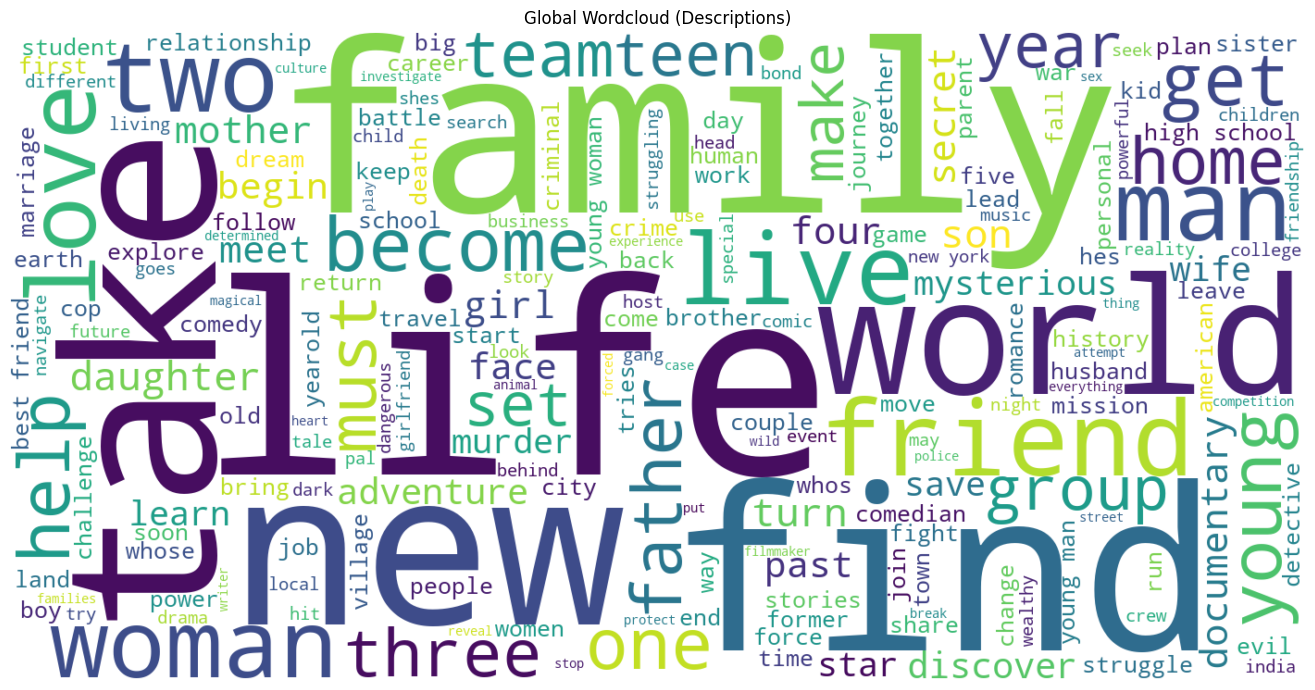

NLP plots generated and saved to 'visualizations/' directory.


In [10]:
# 4. Text Analysis (NLP)

print("\n" + "="*50)
print("SECTION 4: TEXT ANALYSIS (NLP)")
print("="*50)

# --- Preprocess text data ---
netflix_nlp_df = ta.preprocess_text_column(netflix_2021.copy())

# --- Generate and Save NLP Plots ---
print("Generating NLP plots...")

# 1. Top Bigrams
corpus = netflix_nlp_df['clean_description']
top_bigrams = ta.get_top_ngrams(corpus, n=2, top_k=20)
fig_bigrams = ta.plot_ngrams(top_bigrams, title='Top 20 Bigrams in Descriptions', template=PLOTLY_TEMPLATE)
fig_bigrams.write_html(os.path.join(VIZ_DIR, 'nlp_01_top_bigrams.html'))

# 2. Topic Trends Over Time
fig_topic_trends = ta.plot_topic_trends_over_time(netflix_nlp_df, n_topics=5, template=PLOTLY_TEMPLATE)
fig_topic_trends.write_html(os.path.join(VIZ_DIR, 'nlp_02_topic_trends.html'))

# 3. Word Cloud
wordcloud_path = os.path.join(VIZ_DIR, 'nlp_03_wordcloud.png')
ta.generate_wordcloud(corpus, save_path=wordcloud_path)

print("NLP plots generated and saved to 'visualizations/' directory.")

In [11]:
# 5. Statistical & Strategic Analysis

print("\n" + "="*50)
print("SECTION 5: STATISTICAL & STRATEGIC ANALYSIS")
print("="*50)

# --- Generate and Save Statistical Plots & Data ---
print("Running advanced statistical analyses...")

# 1. Time-Series Decomposition
fig_decomp = sa.plot_time_series_decomposition(netflix_2021, template=PLOTLY_TEMPLATE)
if fig_decomp:
    fig_decomp.write_html(os.path.join(VIZ_DIR, 'stat_01_time_series_decomposition.html'))

# 2. HHI and Long Tail
hhi = sa.calculate_hhi(netflix_2021, genre_col='primary_genre')
fig_long_tail = sa.plot_long_tail(netflix_2021, genre_col='primary_genre', template=PLOTLY_TEMPLATE)
fig_long_tail.write_html(os.path.join(VIZ_DIR, 'stat_02_long_tail_plot.html'))

# 3. Quadrant Analysis
quadrant_df = sa.perform_quadrant_analysis(netflix_imdb)
fig_quadrant = sa.plot_quadrant_analysis(quadrant_df, template=PLOTLY_TEMPLATE)
fig_quadrant.write_html(os.path.join(VIZ_DIR, 'stat_03_quadrant_analysis.html'))
quadrant_df.to_csv(os.path.join(OUTPUT_DIR, 'quadrant_analysis_data.csv'), index=False)

# 4. Association Rules
rules = sa.run_association_rules(genre_matrix)
print("\nTop 10 Genre Association Rules:")
print(rules.head(10)[['antecedents', 'consequents', 'lift', 'confidence', 'support']])
rules.to_csv(os.path.join(OUTPUT_DIR, 'genre_association_rules.csv'), index=False)

# 5. Network Analysis (using 2025 data for richer creator info)
net_graph = sa.build_collaboration_network(netflix_2025, min_collabs=5)
centrality_df = sa.get_network_centrality(net_graph)
print("\nTop 10 Most Central Creators (by Degree):")
print(centrality_df.head(10))
centrality_df.to_csv(os.path.join(OUTPUT_DIR, 'network_centrality.csv'))
# Note: Plotting large networks can be slow and is omitted from the main script.
# A plotting function is available in statistical_analysis.py if needed.

print("Statistical analyses complete. Plots and data saved.")


SECTION 5: STATISTICAL & STRATEGIC ANALYSIS
Running advanced statistical analyses...
Performing time-series decomposition...
Calculating HHI for genre concentration...
Genre Concentration (HHI): 920.04
Interpretation: LOW concentration. Well-diversified portfolio.
Plotting genre long-tail distribution...
Performing quadrant analysis...
Plotting quadrant analysis...
Running Apriori algorithm for frequent itemsets...
Generating association rules...

Top 10 Genre Association Rules:
                               antecedents  \
34                   (Science & Nature TV)   
35                            (Docuseries)   
118  (TV Comedies, International TV Shows)   
123                    (Romantic TV Shows)   
8                       (British TV Shows)   
9                             (Docuseries)   
63             (Spanish-Language TV Shows)   
62                (International TV Shows)   
119       (TV Comedies, Romantic TV Shows)   
122               (International TV Shows)   

        

KeyboardInterrupt: 

In [ ]:
# 6. Analysis Complete

print("\n" + "="*50)
print("ANALYSIS PIPELINE COMPLETE")
print("="*50)
print(f"All visualizations saved to: {VIZ_DIR}")
print(f"All data outputs saved to: {OUTPUT_DIR}")